<a href="https://colab.research.google.com/github/ckj18/ToBigs_workspace/blob/main/%5B%ED%88%AC%EB%B9%85%EC%8A%A4_19%EA%B8%B0_%EC%A0%95%EA%B7%9C%EC%84%B8%EC%85%98%5D_2%EC%A3%BC%EC%B0%A8_Regression_%EA%B3%BC%EC%A0%9C_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [과제 2] 회귀분석
### - Ch 1, Ch 2를 토대로 자유롭게 회귀분석과 회귀진단을 진행해주세요.
### - 주석으로 설명 및 근거 자세하게 달아주시면 감사하겠습니다. :)

In [ ]:
%matplotlib inline 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore')

# Data 

데이터 출처 : https://www.kaggle.com/avikasliwal/used-cars-price-prediction 

< y > 
* **Price** : The price of the used car in INR Lakhs.



< X > 
* Name : The brand and model of the car
* Location : The location in which the car is being sold or is available for purchase.
* Year : The year or edition of the model.
* Kilometers_Driven : The total kilometres driven in the car by the previous owner(s) in KM.
* Fuel_Type : The type of fuel used by the car. (Petrol, Diesel, Electric, CNG, LPG)
* Transmission : The type of transmission used by the car. (Automatic / Manual)
* Owner_Type : Whether the ownership is Firsthand, Second hand or other.
* Mileage : The standard mileage offered by the car company in kmpl or km/kg
* Engine : The displacement volume of the engine in CC.
* Power : The maximum power of the engine in bhp.
* Seats : The number of seats in the car.
* New_Price : The price of a new car of the same model.

In [ ]:
# Load Data 
data = pd.read_csv("assignment2_data.csv")
data.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [ ]:
# 숫자와 문자가 결합된 데이터에 숫자 부분을 추출
data['Mileage'] = data['Mileage'].str.extract(r'(\d+)')
data['Engine'] = data['Engine'].str.extract(r'(\d+)')
data['Power'] = data['Power'].str.extract(r'(\d+)')

data[['Mileage', 'Engine', 'Power']] = data[['Mileage', 'Engine', 'Power']].astype('float')

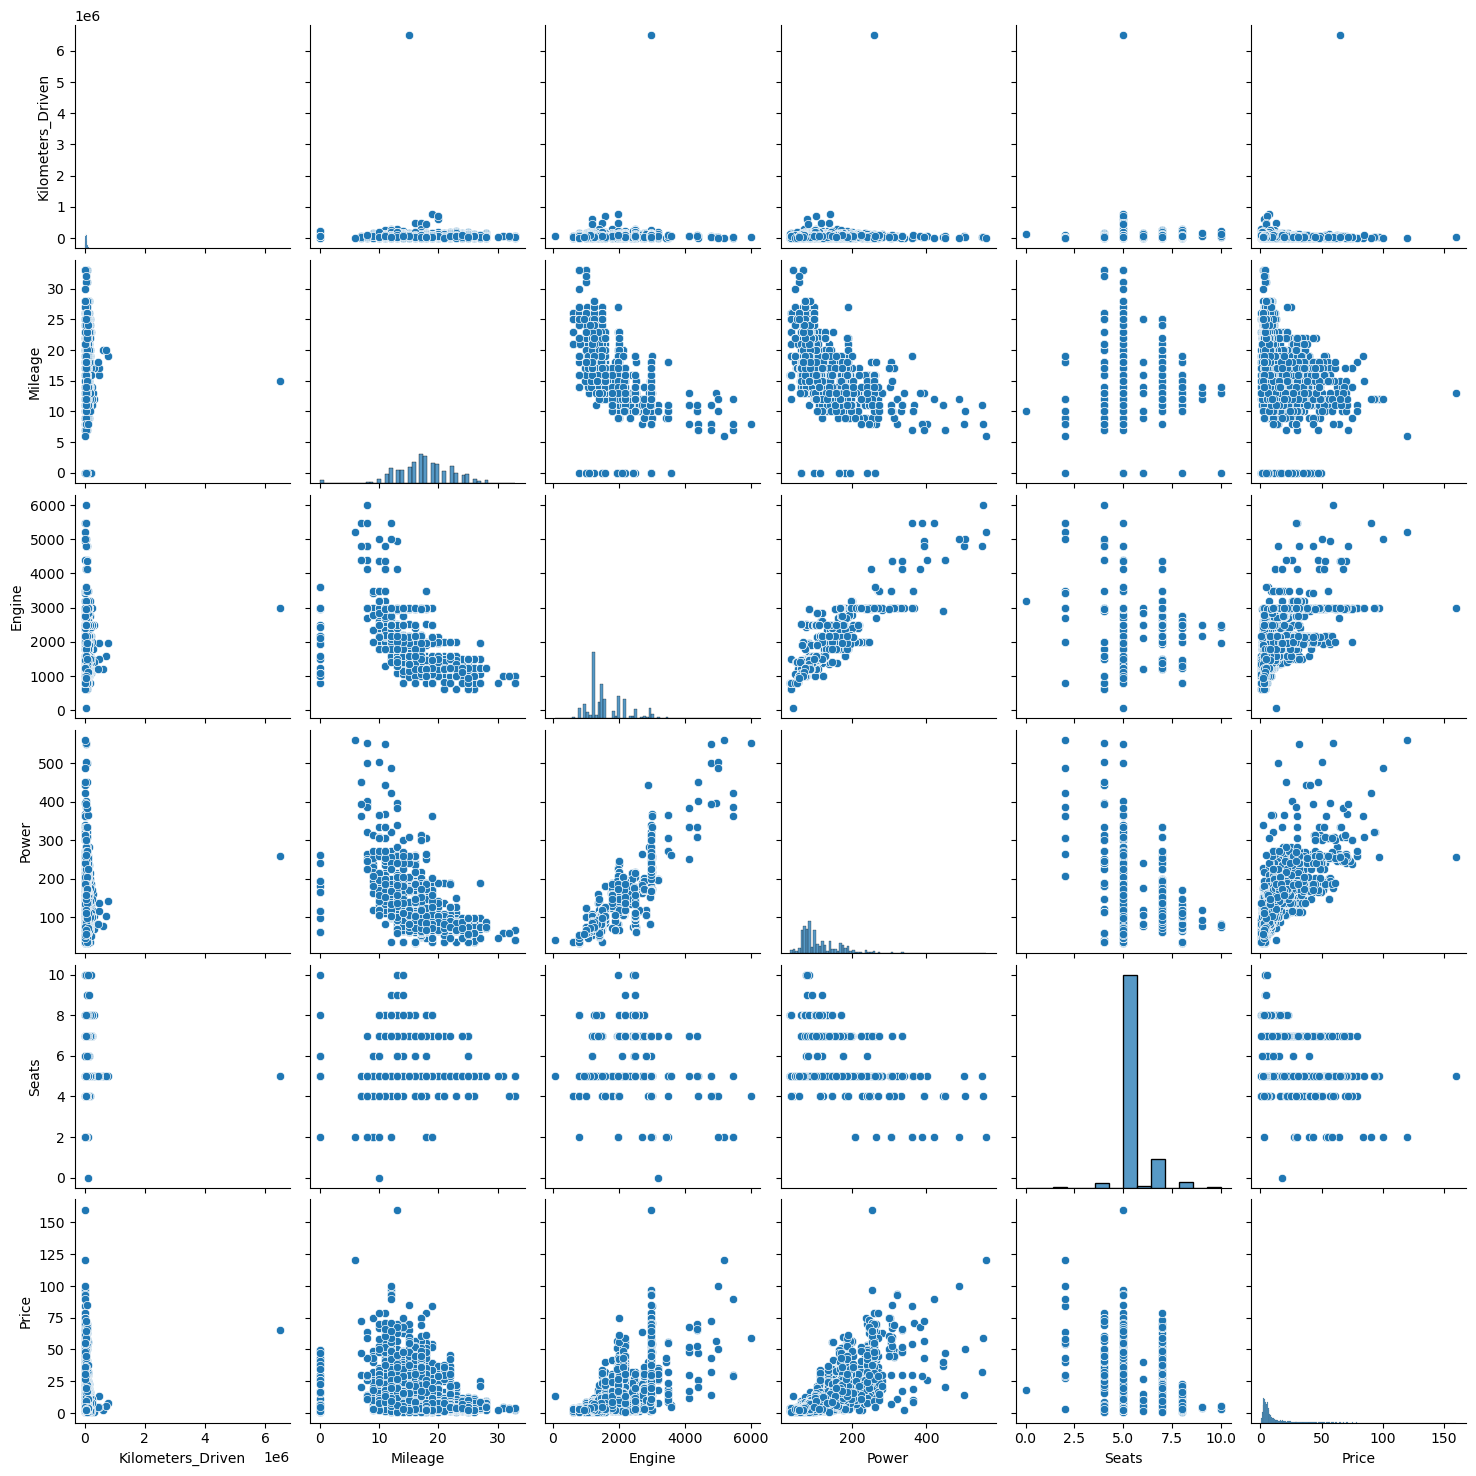

In [ ]:
# 수치형 데이터 칼럼 선택 후, 데이터 시각화
features = ['Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'Price']
data = data[features]

sns.pairplot(data)
plt.show()

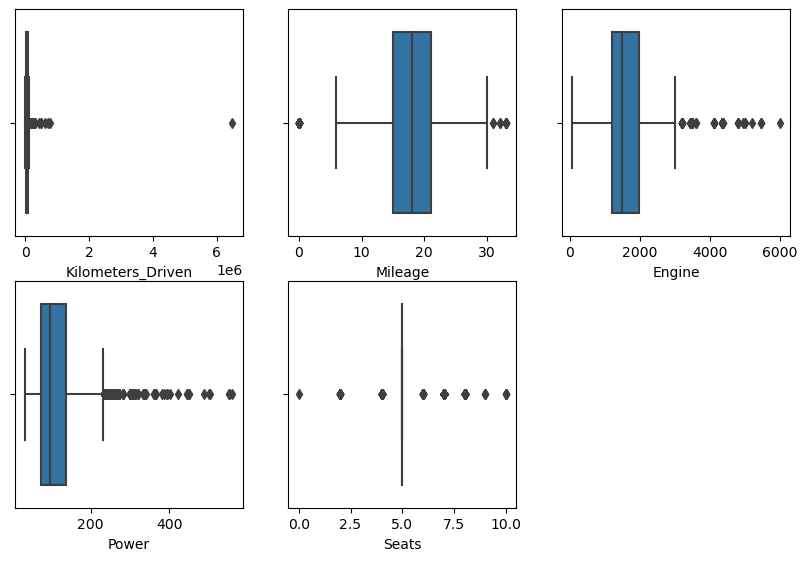

In [ ]:
# 박스플롯으로 시각화: 전반적으로 이상치가 여러 존재
plt.figure(figsize=(10, 10))

plt.subplot(3, 3, 1)
sns.boxplot('Kilometers_Driven', data = data)

plt.subplot(3, 3, 2)
sns.boxplot('Mileage', data = data)

plt.subplot(3, 3, 3)
sns.boxplot('Engine', data = data)

plt.subplot(3, 3, 4)
sns.boxplot('Power', data = data)

plt.subplot(3, 3, 5)
sns.boxplot('Seats', data = data)
plt.show()

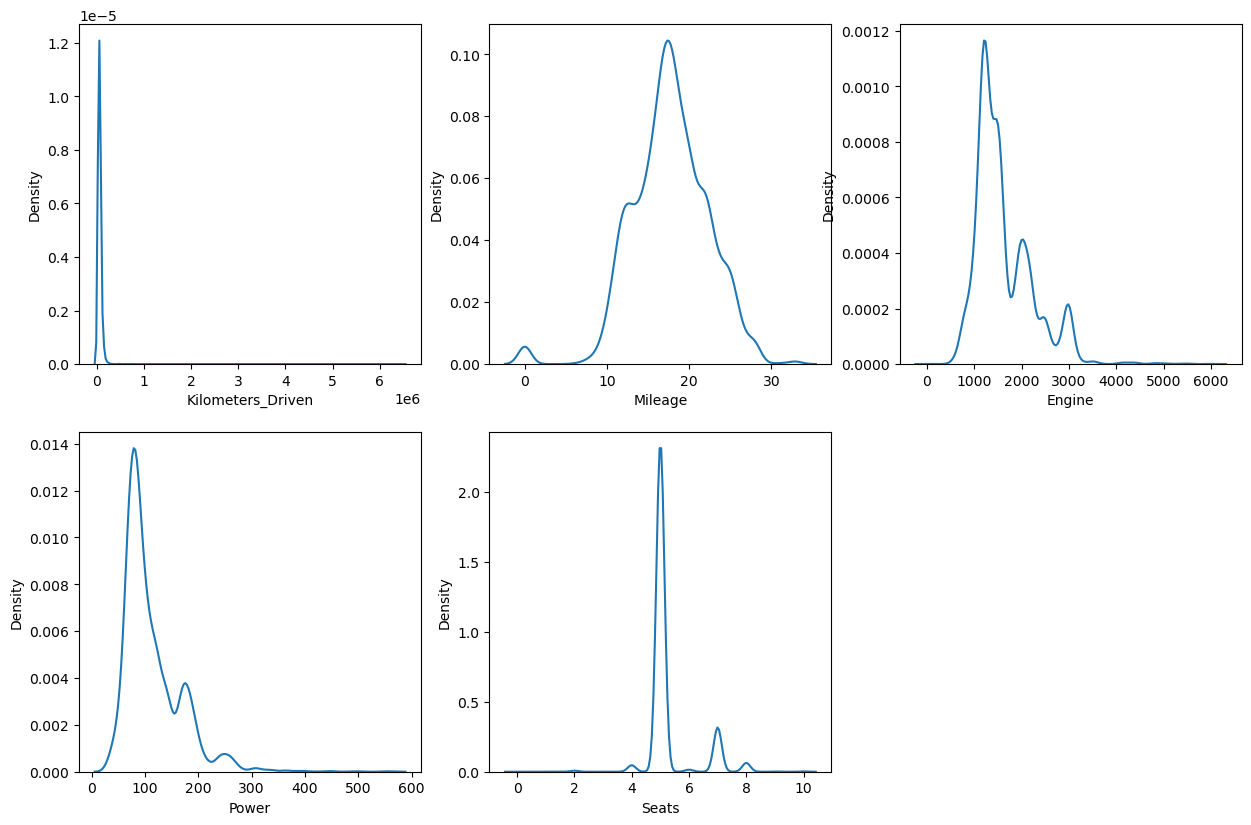

In [ ]:
# kdeplot으로 시각화: 전반적으로 왜도(Skew)가 심한 분포
plt.figure(figsize=(15, 15))

plt.subplot(3, 3, 1)
sns.kdeplot(data['Kilometers_Driven'], data = data)

plt.subplot(3, 3, 2)
sns.kdeplot(data['Mileage'], data = data)

plt.subplot(3, 3, 3)
sns.kdeplot(data['Engine'], data = data)

plt.subplot(3, 3, 4)
sns.kdeplot(data['Power'], data = data)

plt.subplot(3, 3, 5)
sns.kdeplot(data['Seats'], data = data)
plt.show()

In [ ]:
# 결측값 확인 
data.isnull().sum()

Kilometers_Driven      0
Mileage                2
Engine                36
Power                143
Seats                 42
Price                  0
dtype: int64

Text(0, 0.5, 'Engine')

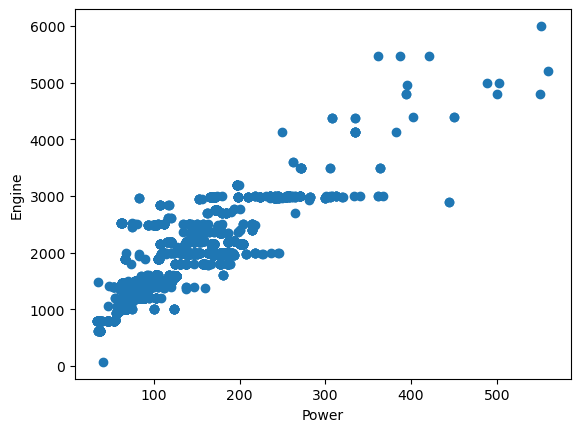

In [ ]:
# 결측값 대체를 위해 Power와 Engine의 관계 파악
plt.scatter(data['Power'],data['Engine']) 
plt.xlabel("Power")
plt.ylabel("Engine")

In [ ]:
# 결측값 대체, 분포가 선형 관계에 근접하므로 비율값을 사용
# 엔진이 파워보다 결측값이 적으므로 엔진 데이터를 통해 파워 값의 근사치를 계산
portion = data['Power'] / data['Engine']
mode = portion.mode()[0]

missingValue = data['Power'][data['Power'].isnull()].index
data['Power'].iloc[missingValue] = round(data['Engine'].iloc[missingValue] * mode)

print(data.iloc[missingValue])

      Kilometers_Driven  Mileage  Engine  Power  Seats  Price
76               111111     17.0  1399.0   83.0    5.0   2.00
79                87591      0.0  1086.0   64.0    5.0   1.30
89                73745     17.0  1086.0   64.0    5.0   2.10
120              102000     17.0  1086.0   64.0    5.0   0.85
143               80759     17.0  1086.0   64.0    5.0   1.67
...                 ...      ...     ...    ...    ...    ...
5873              47200     17.0  1086.0   64.0    5.0   1.20
5893              51000     19.0  1061.0   63.0    NaN   1.75
5925              85000     17.0  1798.0  107.0    5.0   2.85
5943              75000      0.0  2112.0  125.0    6.0   1.70
5985              70000     23.0  1364.0   81.0    5.0   3.88

[143 rows x 6 columns]


In [ ]:
# 모두 결측인 경우, 추정이 어렵기에 제거
data = data.dropna()
data.isnull().sum()

Kilometers_Driven    0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [ ]:
# 데이터 간의 값 차이가 나므로 표준화
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
fitted = scaler.fit_transform(data)
new_data = pd.DataFrame(fitted, columns=[features])
print(new_data.shape)

(5975, 6)


In [ ]:
# OLS로 회귀분석 진행
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

y_data = new_data[['Price']]
x_data = new_data[['Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats']]

x_data = sm.add_constant(x_data, has_constant = "add")

multi_model = sm.OLS(y_data, x_data)
fitted_multi_model = multi_model.fit()
fitted_multi_model.summary()

# 결정계수: 0.6 -> 데이터의 60%을 설명할 수 있음
# Prob(F-통계량): 0.0 -> 회귀식이 모델 전체에 통계적으로 의미 있음
# AIC, BIC: 11,390, 11,430 -> 클수록 모델의 적합도가 좋지 않음
# P > |t|: 유의수준을 넘기는 Engine, Seats는 통계적으로 유의하지 못함
# Durbin-Watson: 2.031, 잔차들은 독립적
# Skew: 2.192, 잔차들이 대칭적이지 못함
# Cond.No: 5.56, 다중공산성은 없음

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.607
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     1842.
Date:                Tue, 31 Jan 2023   Prob (F-statistic):               0.00
Time:                        15:05:22   Log-Likelihood:                -5690.3
No. Observations:                5975   AIC:                         1.139e+04
Df Residuals:                    5969   BIC:                         1.143e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     8.5e-17      0.008   1.05e-14      1.000      -0.016       0.016
('Kilometers_Driven',)    -0.0323      0.008     -3.938      0.000      -0.048      -0.016
('Mileage',)               0.0993      0.010      9.729      0.000       0.079       0.119
('Engine',)                0.0398      0.022      1.848      0.065      -0.002       0.082
('Power',)                 0.7911      0.019     41.234      0.000       0.754       0.829
('Seats',)                -0.0108      0.010     -1.036      0.300      -0.031       0.010
==============================================================================
Omnibus:                     3643.082   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           211119.687
Skew:                           2.192   Prob(JB):                         0.00
Kurtosis:                      31.789   Cond. No.                         5.56
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""